In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from math import fabs

In [2]:
while True:
    noise = np.random.randn(997, 2)
    
    cloud1 = noise
    cloud2 = noise + np.array([randint(-2, 2),randint(-2, 2)])
    cloud3 = noise + np.array([randint(-2, 2),randint(-2, 2)])
    cloud4 = noise + np.array([randint(-2, 2),randint(-2, 2)])
    cloud5 = noise + np.array([randint(-2, 2), randint(-2, 2)])

    X = np.vstack([cloud1, cloud2, cloud3, cloud4, cloud5])

    annot1 = [0] * cloud1.shape[0]
    annot2 = [1] * cloud2.shape[0]
    annot3 = [2] * cloud3.shape[0]
    annot4 = [3] * cloud4.shape[0]
    annot5 = [4] * cloud5.shape[0]
    y = annot1 +annot2 + annot3 + annot4 + annot5

    data, labels = shuffle(X, y)

    test_size = int(len(data) * 0.5)
    Xtrain = data[:test_size]
    Ytrain = labels[:test_size]
    Xtest = data[test_size:]
    Ytest = labels[test_size:]

    clf = LogisticRegression()
    clf.fit(Xtrain, Ytrain)

    predictions = clf.predict(Xtest)

    if accuracy_score(Ytest, predictions)>=0.704:
        if accuracy_score(Ytest, predictions)<=0.716:
            break
accuracy_score(Ytest, predictions)

0.712795828319294

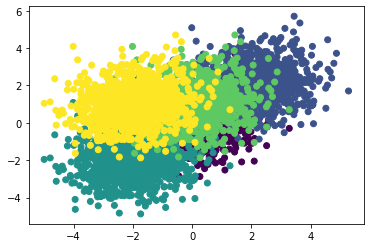

In [3]:
plt.scatter(X[:,0], X[:,1], c=y) 

Для начала мне нужно было рассортировать значения Xtrain по классам, т.к. если мы взглянем на них, то они все находятся в перемешку. Я решил создать массив с 5 подмассивами, в каждом из которых будут храниться координаты соответствующего класса.

In [4]:
dict = [[],[],[],[],[]]
i = 0 
for element in Xtrain:
    classs = Ytrain[i] # переменная classs нужна для того, чтобы каждый элемент знал в какой из подмассивов
                       # он отправится
    dict[classs].append(element) # здесь как раз сортируются координаты по соответствующим подмассивам
    i+=1

Не смотрите на высокопарное название функции. По сути она вычисляет среднее значение для **x** и **y** в переданном ей массиве. Отклонение от среднего значения это и есть мой единственный инструмент классификации в этом коде.

In [5]:
def train (mass):
    allx = []
    ally = []
    for k in range(0, len(mass)):
        allx.append(mass[k][0])
        ally.append(mass[k][1])
    averx = sum(allx)/len(mass)
    avery = sum(ally)/len(mass)
    return (averx, avery)

Тут наверное можно было как-нибудь поизящнее. Поскольку функция возвращает лишь только два значения, а именно среднее **х** и среднее **y**, а классов у нас пять, то я решил каждое соответсвующее значение поместить в соответсвующую ей переменную. Наверное все это можно было встроить в функцию ```train``` и создать там список или словарь, но для меня это оказалось сложно.

In [6]:
avx1, avy1 = train(dict[0])
avx2, avy2 = train(dict[1])
avx3, avy3 = train(dict[2])
avx4, avy4 = train(dict[3])
avx5, avy5 = train(dict[4])

Ну и собственно создание предсказаний для ```Xtest```. Суть проста. Вначале мы высчитываем отклонение каждого элемента от вычисленных ранее средних значений. Чем отклонение ниже, тем соответственно больше вероятности того, что это число по этой координате подходит к проверяемому классу. Остается только умножить отклонение для **х** на отклонение для **y**, получив тем самым произведение отклонения. Когда мы получили произведение отклонений для каждого класса, нам остается выбрать только самое меньшее из них, не забыв при этом определить из какого оно класса. 

In [7]:
def predict (test):
    predict = []
    for co in test:
        diffX1 = fabs(co[0]-avx1)
        diffX2 = fabs(co[0]-avx2)
        diffX3 = fabs(co[0]-avx3)
        diffX4 = fabs(co[0]-avx4)
        diffX5 = fabs(co[0]-avx5)
        diffY1 = fabs(co[1]-avy1)
        diffY2 = fabs(co[1]-avy2)
        diffY3 = fabs(co[1]-avy3)
        diffY4 = fabs(co[1]-avy4)
        diffY5 = fabs(co[1]-avy5)
        
        pred1 = diffX1 * diffY1
        pred2 = diffX2 * diffY2
        pred3 = diffX3 * diffY3
        pred4 = diffX4 * diffY4
        pred5 = diffX5 * diffY5
        
        min = pred1
        clf = 0
        if pred2<min:
            min = pred2
            clf = 1
        if pred3<min:
            min= pred3
            clf = 2
        if pred4<min:
            min= pred4
            clf = 3
        if pred5<min:
            min= pred5
            clf = 4
        predict.append(clf)
    return (predict)

На выходе мы получаем массив с предсказаниями для Xtest

In [8]:
predict = predict(Xtest)

In [9]:
accuracy_score(Ytest, predict)

0.6421981548335339

P.S. Наверное многие заметили, что мы здесь не работаем с вероятностями как таковыми. Значения в ```pred``` это, как выше подчеркнулось, не вероятность того, что число принадлежит к классу, а его произведение отклонений от средних значений. Изначально я писал код, именно с мыслью заложить в нее вероятности, где после операции нахождения отклонения для каждой оси, число делится на свое отклонение от среднего, что в результате дает вероятность принадлежности этого значения оси к классу и остается умножить две вероятности осей. Но помимо того, что это все немного сложнее записывается, так еще и давало точность порой в два раза меньше текущей. Честно, не знаю можно ли считать этот код основаным на наинвом байесовском классификаторе, но решая на бумаге эту задачу, я использовал именно его, просто в процессе выяснилось, что сравнение отклонений эффективней. 

Ну и следующий момент: так как в этом классификаторе за основу берется лишь среднее значение осей, то работать более-менее точно этот код будет только с симметричными облаками, в виде квадрата. Для более сложных фигур нужно вводить такие параметры как минимальное и максимальное значение осей, моду, дисперсию, медиану и прочие характеристики случайных величин.